# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

In [3]:
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization, Flatten

# Load the dataset

# Split the dataset to train and test

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.reshape(-1,)
y_train[:1]

array([[6]], dtype=uint8)

# Separate features and Labels

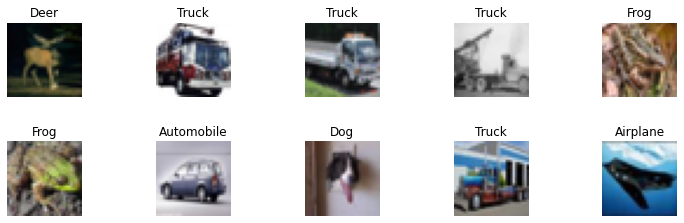

In [8]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
sample = np.random.choice(np.arange(50000),10)
 

fig, axes = plt.subplots(2, 5, figsize=(12,4))
axes = axes.ravel()

for i in range(10):
    idx = sample[i]
    axes[i].imshow(x_train[idx])
    axes[i].set_title(labels[y_train[idx][0]])
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Visualize some images

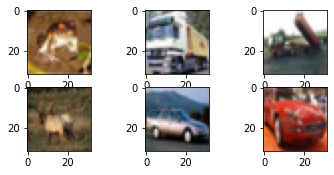

In [9]:
for i in range(6):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [10]:
print('Nummber of images - ',x_train.shape[0])
print('Dimensions of an image - ',x_train.shape[1:3])
print('Number of channels - ',x_train.shape[-1])

Nummber of images -  50000
Dimensions of an image -  (32, 32)
Number of channels -  3


# Data Preprocessing

# Normalizing the data

In [11]:
x_train = x_train/255.0
x_test = x_test/255.0

# One hot encoding

In [12]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

# Build a ANN model

In [13]:
len_flatten = np.product(x_train.shape[1:])
x_train_flatten = x_train.reshape(x_train.shape[0],len_flatten)
x_test_flatten = x_test.reshape(x_test.shape[0],len_flatten)

# Using optimiser ADAM

Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

## Activation funcation - Relu & Softmax

ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero

Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector

In [14]:
model = Sequential()

model.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model.add(Dense(units=128, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=64, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

In [15]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train_flatten, y_train, epochs=10,validation_split=.3) 

Epoch 1/10
1094/1094 [==============================] - 23s 20ms/step - loss: 2.1243 - accuracy: 0.1716 - val_loss: 1.9435 - val_accuracy: 0.2666
Epoch 2/10
1094/1094 [==============================] - 20s 19ms/step - loss: 1.9006 - accuracy: 0.2854 - val_loss: 1.8500 - val_accuracy: 0.3065
Epoch 3/10
1094/1094 [==============================] - 17s 16ms/step - loss: 1.7908 - accuracy: 0.3395 - val_loss: 1.7447 - val_accuracy: 0.3625
Epoch 4/10
1094/1094 [==============================] - 18s 17ms/step - loss: 1.7154 - accuracy: 0.3751 - val_loss: 1.6683 - val_accuracy: 0.3950
Epoch 5/10
1094/1094 [==============================] - 19s 18ms/step - loss: 1.6539 - accuracy: 0.4026 - val_loss: 1.6246 - val_accuracy: 0.4139
Epoch 6/10
1094/1094 [==============================] - 18s 17ms/step - loss: 1.5916 - accuracy: 0.4236 - val_loss: 1.6119 - val_accuracy: 0.4236
Epoch 7/10
1094/1094 [==============================] - 19s 17ms/step - loss: 1.5534 - accuracy: 0.4348 - val_loss: 1.5829 -

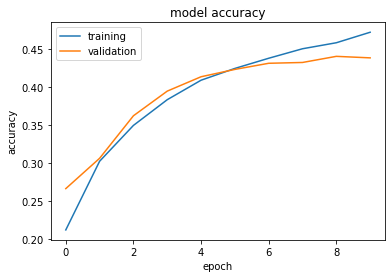

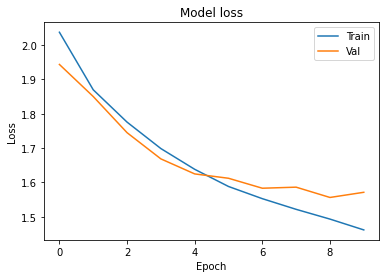

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [18]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5460 - accuracy: 0.4468


[1.546024203300476, 0.44679999351501465]

In [19]:
model.evaluate(x_train_flatten,y_train)

1563/1563 [==============================] - 9s 6ms/step - loss: 1.4935 - accuracy: 0.4618


[1.4934974908828735, 0.46182000637054443]

# Using optimiser SGD
SGD class that implements the stochastic gradient descent optimizer with a learning rate and momentum.

The default learning rate is 0.01 and no momentum is used by default.

## Activation funcation - Relu & Softmax

ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero

Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector

In [20]:
model2 = Sequential()

model2.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model2.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model2.add(Dense(units=128, activation='relu',kernel_initializer='uniform'))
model2.add(Dense(units=64, activation='relu',kernel_initializer='uniform'))
model2.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model2.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history2= model2.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

Epoch 1/10
1094/1094 [==============================] - 17s 15ms/step - loss: 2.3023 - accuracy: 0.1062 - val_loss: 2.3003 - val_accuracy: 0.1050
Epoch 2/10
1094/1094 [==============================] - 14s 13ms/step - loss: 2.2982 - accuracy: 0.1366 - val_loss: 2.2719 - val_accuracy: 0.1461
Epoch 3/10
1094/1094 [==============================] - 14s 13ms/step - loss: 2.2081 - accuracy: 0.1624 - val_loss: 2.0605 - val_accuracy: 0.2123
Epoch 4/10
1094/1094 [==============================] - 14s 13ms/step - loss: 2.0525 - accuracy: 0.2084 - val_loss: 1.9881 - val_accuracy: 0.2574
Epoch 5/10
1094/1094 [==============================] - 15s 14ms/step - loss: 1.9514 - accuracy: 0.2674 - val_loss: 1.9073 - val_accuracy: 0.2921
Epoch 6/10
1094/1094 [==============================] - 16s 14ms/step - loss: 1.8743 - accuracy: 0.3102 - val_loss: 1.8519 - val_accuracy: 0.3216
Epoch 7/10
1094/1094 [==============================] - 15s 14ms/step - loss: 1.8247 - accuracy: 0.3292 - val_loss: 1.8564 -

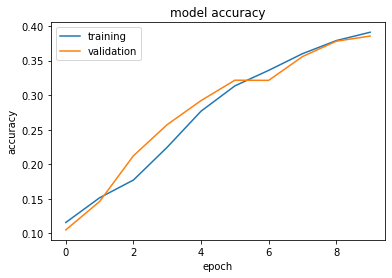

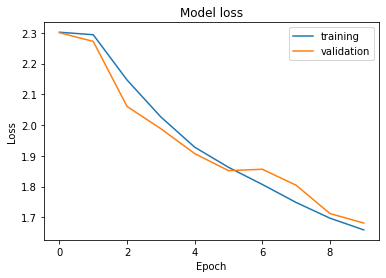

In [22]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

In [23]:
model2.evaluate(x_test_flatten,y_test)
model2.evaluate(x_train_flatten,y_train)

1563/1563 [==============================] - 9s 6ms/step - loss: 1.6541 - accuracy: 0.3937


[1.6540825366973877, 0.3937399983406067]

# Using optimiser SGD
SGD class that implements the stochastic gradient descent optimizer with a learning rate and momentum.

The default learning rate is 0.01 and no momentum is used by default.

## Activation funcation - Relu,Softmax,Selu,Softplus

### Scaled Exponential Linear Unit (SELU)
if x > 0: return scale * x

if x < 0: return scale * alpha * (exp(x) - 1)

where alpha and scale are pre-defined constants (alpha=1.67326324 and scale=1.05070098)

Basically, the SELU activation function multiplies scale (> 1) 
 

Epoch 1/10
1094/1094 [==============================] - 19s 15ms/step - loss: 2.3045 - accuracy: 0.1027 - val_loss: 2.2911 - val_accuracy: 0.0979
Epoch 2/10
1094/1094 [==============================] - 15s 14ms/step - loss: 2.2528 - accuracy: 0.1502 - val_loss: 2.0801 - val_accuracy: 0.1859
Epoch 3/10
1094/1094 [==============================] - 15s 14ms/step - loss: 2.0564 - accuracy: 0.2012 - val_loss: 2.0346 - val_accuracy: 0.2301
Epoch 4/10
1094/1094 [==============================] - 15s 14ms/step - loss: 2.0000 - accuracy: 0.2442 - val_loss: 1.9491 - val_accuracy: 0.2661
Epoch 5/10
1094/1094 [==============================] - 16s 14ms/step - loss: 1.9169 - accuracy: 0.2806 - val_loss: 1.8830 - val_accuracy: 0.3035
Epoch 6/10
1094/1094 [==============================] - 15s 14ms/step - loss: 1.8675 - accuracy: 0.3096 - val_loss: 1.8516 - val_accuracy: 0.3239
Epoch 7/10
1094/1094 [==============================] - 15s 14ms/step - loss: 1.8264 - accuracy: 0.3243 - val_loss: 1.8070 -

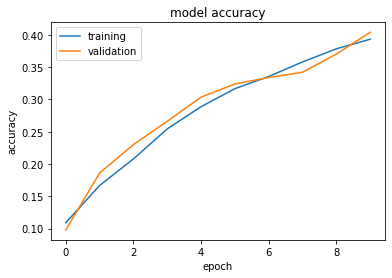

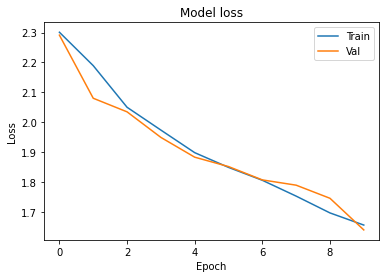

1563/1563 [==============================] - 8s 5ms/step - loss: 1.6098 - accuracy: 0.4131


[1.6097919940948486, 0.4131399989128113]

In [24]:
model3 = Sequential()

model3.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model3.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model3.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model3.add(Dense(units=64, activation='softplus',kernel_initializer='uniform'))
model3.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model3.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

history3= model3.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model3.evaluate(x_test_flatten,y_test)
model3.evaluate(x_train_flatten,y_train)

# Using optimiser ADAM¶
Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.


## Activation funcation - Relu,Softmax,Selu,Softplus¶
#### Scaled Exponential Linear Unit (SELU)
if x > 0: return scale * x

if x < 0: return scale * alpha * (exp(x) - 1)

where alpha and scale are pre-defined constants (alpha=1.67326324 and scale=1.05070098)

Basically, the SELU activation function multiplies scale (> 1)

Epoch 1/10
1094/1094 [==============================] - 20s 17ms/step - loss: 2.0419 - accuracy: 0.2266 - val_loss: 1.8188 - val_accuracy: 0.3408
Epoch 2/10
1094/1094 [==============================] - 19s 17ms/step - loss: 1.7898 - accuracy: 0.3502 - val_loss: 1.7463 - val_accuracy: 0.3741
Epoch 3/10
1094/1094 [==============================] - 18s 16ms/step - loss: 1.6862 - accuracy: 0.3920 - val_loss: 1.6581 - val_accuracy: 0.4042
Epoch 4/10
1094/1094 [==============================] - 19s 18ms/step - loss: 1.6063 - accuracy: 0.4224 - val_loss: 1.6200 - val_accuracy: 0.4183
Epoch 5/10
1094/1094 [==============================] - 18s 16ms/step - loss: 1.5623 - accuracy: 0.4358 - val_loss: 1.6528 - val_accuracy: 0.4080
Epoch 6/10
1094/1094 [==============================] - 18s 16ms/step - loss: 1.5249 - accuracy: 0.4513 - val_loss: 1.5710 - val_accuracy: 0.4325
Epoch 7/10
1094/1094 [==============================] - 19s 17ms/step - loss: 1.4914 - accuracy: 0.4622 - val_loss: 1.5295 -

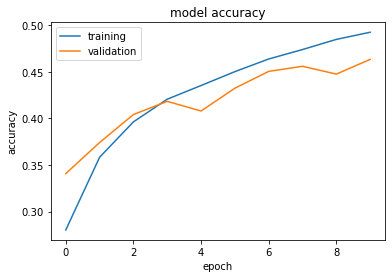

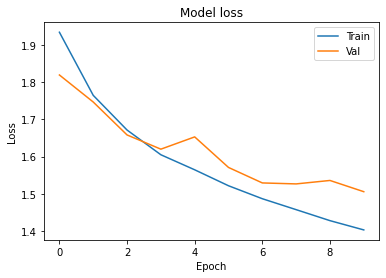

1563/1563 [==============================] - 8s 5ms/step - loss: 1.4101 - accuracy: 0.4929


[1.4101319313049316, 0.492900013923645]

In [25]:
model4 = Sequential()

model4.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model4.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model4.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model4.add(Dense(units=64, activation='softplus',kernel_initializer='uniform'))
model4.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model4.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history4= model4.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model4.evaluate(x_test_flatten,y_test)
model4.evaluate(x_train_flatten,y_train)

# Using optimiser RMSProp
RmsProp is an optimizer that utilizes the magnitude of recent gradients to normalize the gradients. We always keep a moving average over the root mean squared (hence Rms) gradients, by which we divide the current gradient.

## Activation funcation Relu,Selu,Elu & Softplus

Exponential Linear Unit(ELU) is a function that tend to converge cost to zero faster and produce more accurate results.Different to other activation functions, ELU has a extra alpha constant which should be positive number

Epoch 1/10
1094/1094 [==============================] - 41s 36ms/step - loss: 2.0573 - accuracy: 0.2299 - val_loss: 1.7920 - val_accuracy: 0.3479
Epoch 2/10
1094/1094 [==============================] - 39s 35ms/step - loss: 1.7868 - accuracy: 0.3521 - val_loss: 1.7160 - val_accuracy: 0.3891
Epoch 3/10
1094/1094 [==============================] - 37s 34ms/step - loss: 1.6932 - accuracy: 0.3940 - val_loss: 1.7477 - val_accuracy: 0.3820
Epoch 4/10
1094/1094 [==============================] - 37s 34ms/step - loss: 1.6224 - accuracy: 0.4186 - val_loss: 1.6313 - val_accuracy: 0.4185
Epoch 5/10
1094/1094 [==============================] - 36s 32ms/step - loss: 1.5780 - accuracy: 0.4389 - val_loss: 1.6033 - val_accuracy: 0.4361
Epoch 6/10
1094/1094 [==============================] - 38s 35ms/step - loss: 1.5513 - accuracy: 0.4507 - val_loss: 1.5723 - val_accuracy: 0.4409
Epoch 7/10
1094/1094 [==============================] - 37s 34ms/step - loss: 1.5184 - accuracy: 0.4619 - val_loss: 1.5839 -

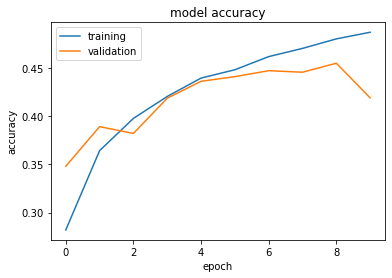

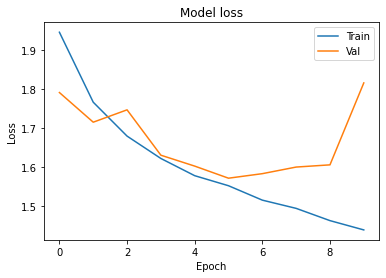

1563/1563 [==============================] - 4s 3ms/step - loss: 1.7098 - accuracy: 0.4392


[1.709778904914856, 0.4391799867153168]

In [26]:
model5 = Sequential()

model5.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model5.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model5.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model5.add(Dense(units=64, activation='elu',kernel_initializer='uniform'))
model5.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model5.compile(optimizer="RMSProp", loss='categorical_crossentropy', metrics=['accuracy'])

history5= model5.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model5.evaluate(x_test_flatten,y_test)
model5.evaluate(x_train_flatten,y_train)

# Using optimiser RMSProp

## Activation funcation Relu,Selu,Elu & Softmax

Softmax function calculates the probabilities distribution of the event over ‘n’ different events. In general way of saying, this function will calculate the probabilities of each target class over all possible target classes. Later the calculated probabilities will be helpful for determining the target class for the given inputs.

Epoch 1/10
1094/1094 [==============================] - 22s 19ms/step - loss: 2.0600 - accuracy: 0.2256 - val_loss: 1.8070 - val_accuracy: 0.3507
Epoch 2/10
1094/1094 [==============================] - 20s 18ms/step - loss: 1.7938 - accuracy: 0.3487 - val_loss: 1.7872 - val_accuracy: 0.3572
Epoch 3/10
1094/1094 [==============================] - 20s 18ms/step - loss: 1.6897 - accuracy: 0.3887 - val_loss: 1.6720 - val_accuracy: 0.3990
Epoch 4/10
1094/1094 [==============================] - 20s 18ms/step - loss: 1.6172 - accuracy: 0.4177 - val_loss: 1.6750 - val_accuracy: 0.4195
Epoch 5/10
1094/1094 [==============================] - 19s 18ms/step - loss: 1.5652 - accuracy: 0.4395 - val_loss: 1.5671 - val_accuracy: 0.4410
Epoch 6/10
1094/1094 [==============================] - 19s 18ms/step - loss: 1.5307 - accuracy: 0.4475 - val_loss: 1.5587 - val_accuracy: 0.4466
Epoch 7/10
1094/1094 [==============================] - 19s 18ms/step - loss: 1.4850 - accuracy: 0.4678 - val_loss: 1.5683 -

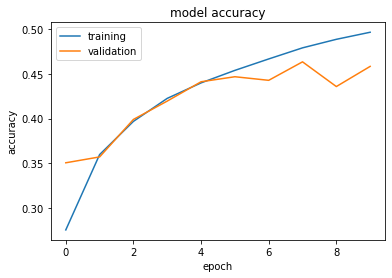

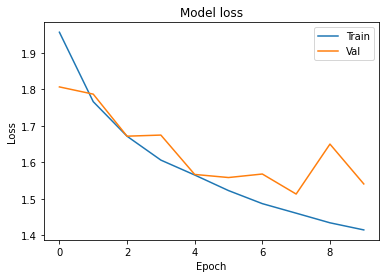

1563/1563 [==============================] - 4s 2ms/step - loss: 1.4339 - accuracy: 0.4886


[1.4338963031768799, 0.4885999858379364]

In [27]:
model5_1 = Sequential()

model5_1.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model5_1.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model5_1.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model5_1.add(Dense(units=64, activation='elu',kernel_initializer='uniform'))
model5_1.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model5_1.compile(optimizer="RMSProp", loss='categorical_crossentropy', metrics=['accuracy'])

history5_1= model5_1.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history5_1.history['accuracy'])
plt.plot(history5_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history5_1.history['loss'])
plt.plot(history5_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model5_1.evaluate(x_test_flatten,y_test)
model5_1.evaluate(x_train_flatten,y_train)

# Using Optimiser Adagrad

Adaptive Gradient Algorithm (Adagrad) is an algorithm for gradient-based optimization.It performs smaller updates As a result, it is well-suited when dealing with sparse data (NLP or image recognition) Each parameter has its own learning rate that improves performance on problems with sparse gradients.

## Activation funcation Relu,Selu,Elu & Softmax

Epoch 1/10
1094/1094 [==============================] - 10s 9ms/step - loss: 2.3019 - accuracy: 0.1064 - val_loss: 2.2984 - val_accuracy: 0.1073
Epoch 2/10
1094/1094 [==============================] - 9s 9ms/step - loss: 2.2969 - accuracy: 0.1039 - val_loss: 2.2887 - val_accuracy: 0.1216
Epoch 3/10
1094/1094 [==============================] - 10s 9ms/step - loss: 2.2824 - accuracy: 0.1422 - val_loss: 2.2356 - val_accuracy: 0.1980
Epoch 4/10
1094/1094 [==============================] - 10s 9ms/step - loss: 2.1993 - accuracy: 0.1909 - val_loss: 2.1048 - val_accuracy: 0.1919
Epoch 5/10
1094/1094 [==============================] - 9s 9ms/step - loss: 2.0908 - accuracy: 0.1922 - val_loss: 2.0669 - val_accuracy: 0.1976
Epoch 6/10
1094/1094 [==============================] - 10s 9ms/step - loss: 2.0610 - accuracy: 0.1974 - val_loss: 2.0589 - val_accuracy: 0.2015
Epoch 7/10
1094/1094 [==============================] - 10s 9ms/step - loss: 2.0426 - accuracy: 0.2073 - val_loss: 2.0397 - val_accu

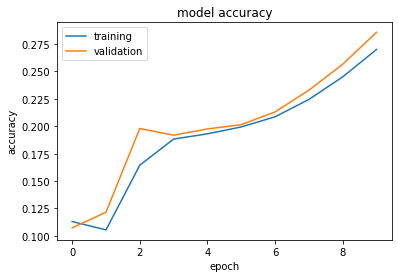

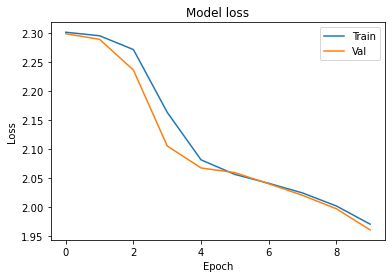

1563/1563 [==============================] - 4s 2ms/step - loss: 1.9521 - accuracy: 0.2842


[1.952088713645935, 0.28422001004219055]

In [28]:
model6 = Sequential()

model6.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model6.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model6.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model6.add(Dense(units=64, activation='elu',kernel_initializer='uniform'))
model6.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model6.compile(optimizer="Adagrad", loss='categorical_crossentropy', metrics=['accuracy'])

history6= model6.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model6.evaluate(x_test_flatten,y_test)
model6.evaluate(x_train_flatten,y_train)

In [29]:
import tensorflow.compat.v1 as tf

# Using Optimiser Gradient Descent

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

## Activation funcation Relu,Selu,Elu & Softmax

Epoch 1/10
1094/1094 [==============================] - 8s 7ms/step - loss: 2.1116 - accuracy: 0.2069 - val_loss: 1.8282 - val_accuracy: 0.3159
Epoch 2/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.8269 - accuracy: 0.3359 - val_loss: 1.8313 - val_accuracy: 0.3275
Epoch 3/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.7284 - accuracy: 0.3735 - val_loss: 2.2079 - val_accuracy: 0.2999
Epoch 4/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.6836 - accuracy: 0.3937 - val_loss: 1.9283 - val_accuracy: 0.3352
Epoch 5/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.6142 - accuracy: 0.4186 - val_loss: 1.6494 - val_accuracy: 0.4097
Epoch 6/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.5780 - accuracy: 0.4333 - val_loss: 1.6341 - val_accuracy: 0.4141
Epoch 7/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.5141 - accuracy: 0.4543 - val_loss: 1.6459 - val_accuracy:

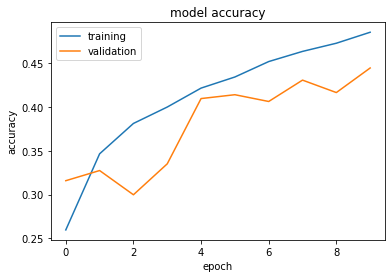

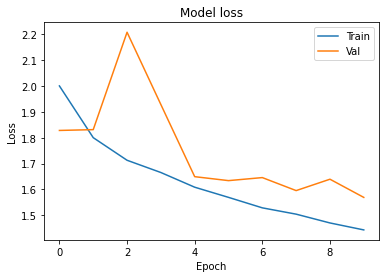

1563/1563 [==============================] - 4s 2ms/step - loss: 1.4551 - accuracy: 0.4781


[1.4551353454589844, 0.4781000018119812]

In [30]:
optimizer = tf.train.GradientDescentOptimizer(0.2)

model7 = Sequential()

model7.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model7.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model7.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model7.add(Dense(units=64, activation='elu',kernel_initializer='uniform'))
model7.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model7.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history7= model7.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model7.evaluate(x_test_flatten,y_test)
model7.evaluate(x_train_flatten,y_train)

# Using Optimiser Momentum Based Gradient Descent

SGD with momentum is method which helps accelerate gradients vectors in the right directions, thus leading to faster converging. It is one of the most popular optimization algorithms and many state-of-the-art models are trained using it.

## Activation funcation Relu,Selu,Elu & Softplus

Epoch 1/10
1094/1094 [==============================] - 11s 10ms/step - loss: 2.1702 - accuracy: 0.1577 - val_loss: 2.0970 - val_accuracy: 0.1796
Epoch 2/10
1094/1094 [==============================] - 9s 9ms/step - loss: 2.1052 - accuracy: 0.1784 - val_loss: 2.0879 - val_accuracy: 0.1837
Epoch 3/10
1094/1094 [==============================] - 9s 9ms/step - loss: 2.0912 - accuracy: 0.1876 - val_loss: 2.0865 - val_accuracy: 0.1855
Epoch 4/10
1094/1094 [==============================] - 9s 8ms/step - loss: 2.0706 - accuracy: 0.2000 - val_loss: 2.0949 - val_accuracy: 0.1986
Epoch 5/10
1094/1094 [==============================] - 9s 8ms/step - loss: 2.1020 - accuracy: 0.2028 - val_loss: 2.0873 - val_accuracy: 0.2153
Epoch 6/10
1094/1094 [==============================] - 9s 8ms/step - loss: 2.0909 - accuracy: 0.2015 - val_loss: 2.0803 - val_accuracy: 0.1974
Epoch 7/10
1094/1094 [==============================] - 9s 8ms/step - loss: 2.1251 - accuracy: 0.1820 - val_loss: 2.1543 - val_accurac

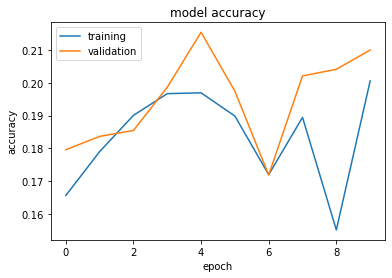

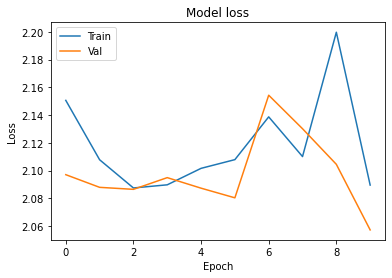

1563/1563 [==============================] - 4s 2ms/step - loss: 2.0519 - accuracy: 0.2122


[2.0518531799316406, 0.21220000088214874]

In [31]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

model8 = Sequential()

model8.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model8.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model8.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model8.add(Dense(units=64, activation='elu',kernel_initializer='uniform'))
model8.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model8.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history8= model8.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model8.evaluate(x_test_flatten,y_test)
model8.evaluate(x_train_flatten,y_train)

# Using Optimiser Mini-Batch Gradient Descent

Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

## Activation funcation Relu,Selu,Elu & Softplus

Epoch 1/10
350/350 [==============================] - 6s 14ms/step - loss: 2.0502 - accuracy: 0.2240 - val_loss: 1.8242 - val_accuracy: 0.3332
Epoch 2/10
350/350 [==============================] - 5s 13ms/step - loss: 1.7741 - accuracy: 0.3540 - val_loss: 1.7172 - val_accuracy: 0.3765
Epoch 3/10
350/350 [==============================] - 5s 14ms/step - loss: 1.6688 - accuracy: 0.3956 - val_loss: 1.6596 - val_accuracy: 0.3986
Epoch 4/10
350/350 [==============================] - 5s 13ms/step - loss: 1.5970 - accuracy: 0.4216 - val_loss: 1.6523 - val_accuracy: 0.3985
Epoch 5/10
350/350 [==============================] - 5s 13ms/step - loss: 1.5468 - accuracy: 0.4428 - val_loss: 1.5536 - val_accuracy: 0.4394
Epoch 6/10
350/350 [==============================] - 5s 13ms/step - loss: 1.4932 - accuracy: 0.4613 - val_loss: 1.5167 - val_accuracy: 0.4574
Epoch 7/10
350/350 [==============================] - 5s 14ms/step - loss: 1.4536 - accuracy: 0.4733 - val_loss: 1.5424 - val_accuracy: 0.4466

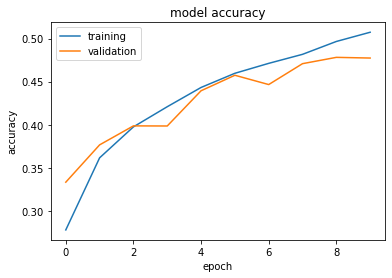

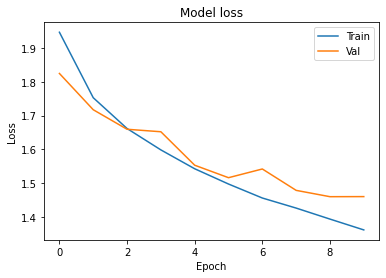

1563/1563 [==============================] - 5s 3ms/step - loss: 1.3472 - accuracy: 0.5114


[1.34718656539917, 0.5114399790763855]

In [32]:
model9 = Sequential()

model9.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model9.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model9.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model9.add(Dense(units=64, activation='elu',kernel_initializer='uniform'))
model9.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model9.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history9= model9.fit(x_train_flatten, y_train, epochs=10,batch_size= 100,validation_split=.3)

plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model9.evaluate(x_test_flatten,y_test)
model9.evaluate(x_train_flatten,y_train)

# Using Optimiser Nesterov Accelerated Gradient

Nesterov Accelerated Gradient method consists of a gradient descent step, followed by something that looks a lot like a momentum term, but isn't exactly the same as that found in classical momentum

## Activation funcation Relu,Selu,Elu & Softplus

Epoch 1/10
1094/1094 [==============================] - 9s 8ms/step - loss: 2.3003 - accuracy: 0.1370 - val_loss: 2.2840 - val_accuracy: 0.1407
Epoch 2/10
1094/1094 [==============================] - 8s 8ms/step - loss: 2.2323 - accuracy: 0.1670 - val_loss: 2.0836 - val_accuracy: 0.1903
Epoch 3/10
1094/1094 [==============================] - 8s 8ms/step - loss: 2.0595 - accuracy: 0.1993 - val_loss: 2.0577 - val_accuracy: 0.2238
Epoch 4/10
1094/1094 [==============================] - 8s 8ms/step - loss: 1.9961 - accuracy: 0.2531 - val_loss: 1.9274 - val_accuracy: 0.2779
Epoch 5/10
1094/1094 [==============================] - 8s 8ms/step - loss: 1.9023 - accuracy: 0.2851 - val_loss: 1.8674 - val_accuracy: 0.3142
Epoch 6/10
1094/1094 [==============================] - 8s 8ms/step - loss: 1.8493 - accuracy: 0.3143 - val_loss: 1.8259 - val_accuracy: 0.3333
Epoch 7/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.8091 - accuracy: 0.3326 - val_loss: 1.7665 - val_accuracy:

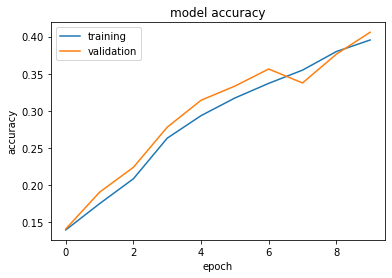

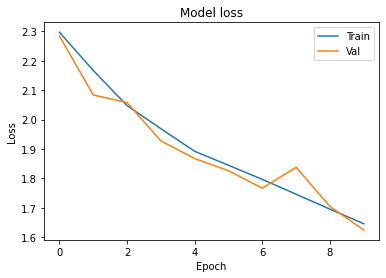

1563/1563 [==============================] - 4s 2ms/step - loss: 1.5920 - accuracy: 0.4173


[1.5919915437698364, 0.417279988527298]

In [33]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=True, name="SGD")

model10 = Sequential()

model10.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model10.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model10.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model10.add(Dense(units=64, activation='elu',kernel_initializer='uniform'))
model10.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model10.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history10= model10.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model10.evaluate(x_test_flatten,y_test)
model10.evaluate(x_train_flatten,y_train)

# Using Optimiser Adam

## Activation funcation Relu,Selu,Elu & Softplus

## Dropout 
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference.

## Batch normalization
Batch normalization is a technique designed to automatically standardize the inputs to a layer in a deep learning neural network.discover how to use batch normalization to accelerate the training of deep learning neural networks in Python with Keras

Epoch 1/10
1094/1094 [==============================] - 13s 11ms/step - loss: 1.9827 - accuracy: 0.2739 - val_loss: 2.0948 - val_accuracy: 0.2413
Epoch 2/10
1094/1094 [==============================] - 12s 11ms/step - loss: 1.8513 - accuracy: 0.3228 - val_loss: 1.7589 - val_accuracy: 0.3666
Epoch 3/10
1094/1094 [==============================] - 13s 11ms/step - loss: 1.8346 - accuracy: 0.3359 - val_loss: 1.7743 - val_accuracy: 0.3699
Epoch 4/10
1094/1094 [==============================] - 12s 11ms/step - loss: 1.7952 - accuracy: 0.3517 - val_loss: 1.7136 - val_accuracy: 0.3876
Epoch 5/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.7761 - accuracy: 0.3582 - val_loss: 1.7334 - val_accuracy: 0.3779
Epoch 6/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.7681 - accuracy: 0.3614 - val_loss: 1.6713 - val_accuracy: 0.4035
Epoch 7/10
1094/1094 [==============================] - 12s 11ms/step - loss: 1.7505 - accuracy: 0.3651 - val_loss: 1.6758 -

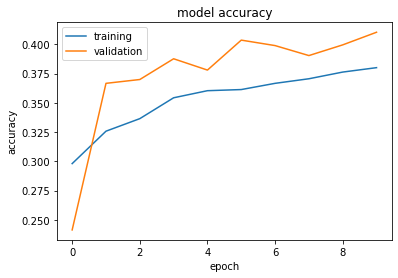

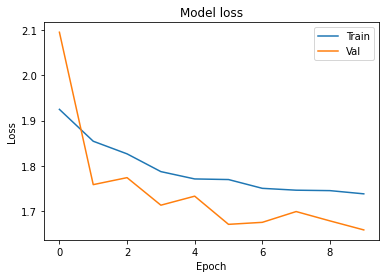

1563/1563 [==============================] - 4s 3ms/step - loss: 1.6214 - accuracy: 0.4219


[1.621367335319519, 0.4219200015068054]

In [34]:
model_d = Sequential()

model_d.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model_d.add(Dropout(0.2))
model_d.add(BatchNormalization())
model_d.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model_d.add(Dropout(0.2))
model_d.add(BatchNormalization())
model_d.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model_d.add(Dropout(0.2))
model_d.add(BatchNormalization())
model_d.add(Dense(units=64, activation='elu',kernel_initializer='uniform'))
model_d.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model_d.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history_d= model_d.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history_d.history['accuracy'])
plt.plot(history_d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history_d.history['loss'])
plt.plot(history_d.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model_d.evaluate(x_test_flatten,y_test)
model_d.evaluate(x_train_flatten,y_train)

In [35]:
model_d.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_57 (Dense)             (None, 128)             

# Using Optimiser Stochastic Gradient Descent (SGD)

## Activation funcation Relu,Selu,Elu & Softplus

## Dropout 
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference.

## Batch normalization
Batch normalization is a technique designed to automatically standardize the inputs to a layer in a deep learning neural network.discover how to use batch normalization to accelerate the training of deep learning neural networks in Python with Keras

Epoch 1/10
1094/1094 [==============================] - 11s 9ms/step - loss: 2.2034 - accuracy: 0.1893 - val_loss: 1.9096 - val_accuracy: 0.2921
Epoch 2/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.8977 - accuracy: 0.2936 - val_loss: 1.8333 - val_accuracy: 0.3225
Epoch 3/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.8299 - accuracy: 0.3298 - val_loss: 1.7871 - val_accuracy: 0.3549
Epoch 4/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.7943 - accuracy: 0.3433 - val_loss: 1.7605 - val_accuracy: 0.3611
Epoch 5/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.7815 - accuracy: 0.3553 - val_loss: 1.8550 - val_accuracy: 0.3271
Epoch 6/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.7713 - accuracy: 0.3582 - val_loss: 2.1241 - val_accuracy: 0.2666
Epoch 7/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.7866 - accuracy: 0.3496 - val_loss: 1.7699 - val_accuracy

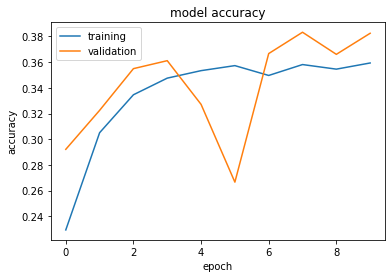

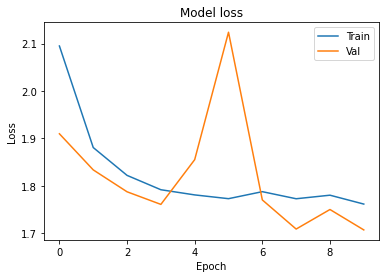

1563/1563 [==============================] - 4s 3ms/step - loss: 1.6753 - accuracy: 0.3936


[1.6753239631652832, 0.39364001154899597]

In [36]:
model_s = Sequential()

model_s.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model_s.add(Dropout(0.2))
model_s.add(BatchNormalization())
model_s.add(Dense(units=256, activation='relu',kernel_initializer='uniform'))
model_s.add(Dropout(0.2))
model_s.add(BatchNormalization())
model_s.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model_s.add(Dropout(0.2))
model_s.add(BatchNormalization())
model_s.add(Dense(units=64, activation='elu',kernel_initializer='uniform'))
model_s.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model_s.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

history_s= model_s.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history_s.history['accuracy'])
plt.plot(history_s.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history_s.history['loss'])
plt.plot(history_s.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model_s.evaluate(x_test_flatten,y_test)
model_s.evaluate(x_train_flatten,y_train)

In [37]:
model_s.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_61 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_62 (Dense)             (None, 128)             

## Mini-Batch Gradient Descent
Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

Activation funcation Relu,Selu,Elu & Softplus

Test accuracy: 0.4857

Train accuracy: 0.5114